In [1]:
using Eirene
using DelimitedFiles
using PlotlyJS

[ Info: Precompiling Eirene [9c0f25c4-2ca1-5870-89f6-52640788da1d]
┌ Warning: Package Eirene does not have SharedArrays in its dependencies:
│ - If you have Eirene checked out for development and have
│   added SharedArrays as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Eirene
└ Loading SharedArrays into Eirene from project dependency, future warnings for Eirene are suppressed.


WebIO._IJuliaInit()

In [2]:

file = "torus_points_corrected.csv"
folder = "C:/Users/jevin/Documents/Documents/Education/Self-Learning/Persistant Homology/PHAML/data/"
file_path = folder * file
sphere_pc = readdlm(file_path, ',')

3×1000 Matrix{Float64}:
 -2.89993   -0.601183   2.50629   …  -2.19056    1.57283   -1.72272
 -0.737326   2.43442   -1.3203        2.03206   -1.58208   -0.33681
  0.124664   0.861623   0.553589      0.154792  -0.972986  -0.969608

In [3]:
PH = eirene(sphere_pc, maxdim=1, model="pc")


Dict{String, Any} with 12 entries:
  "symmat"   => [401419 401178 … 19389 7836; 401178 401419 … 13489 4316; … ; 19…
  "maxnz"    => [0, 52309, 8469579, 1, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  992, 993, 994, 995, 996, 99…
  "cyclerep" => [Vector{Int64}[], [[8, 12], [4, 6], [30, 33], [36, 43], [14, 22…
  "phi"      => [Int64[], [6952, 2984, 28449, 34220, 12870, 998, 401267, 62523,…
  "plo"      => [Int64[], [12, 6, 33, 43, 22, 5, 983, 66, 109, 59  …  729, 49, …
  "ocg2rad"  => [3.98763, 3.98763, 3.98763, 3.98763, 3.98762, 3.98759, 3.98759,…
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  991, 992, 993, 994, 995, 99…
  "nvl2ovl"  => [317, 623, 684, 759, 114, 894, 971, 545, 176, 805  …  935, 435,…
  "input"    => Dict{String, Any}("genera"=>[-2.89993 -0.601183 … 1.57283 -1.72…
  "tid"      => [Int64[], [12, 6, 33, 43, 22, 5, 983, 66, 109, 59  …  49, 734, …
  "grain"    => [[401419, 401419, 401419, 401419, 401419, 401419, 401419, 40141…

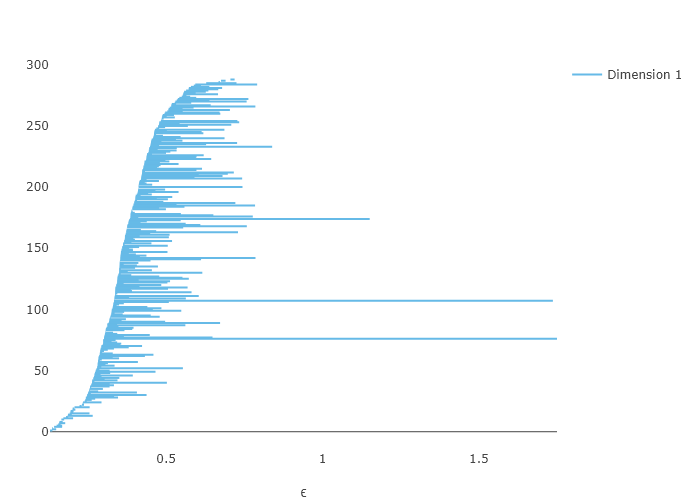

In [5]:
plotbarcode_pjs(PH, dim=1)

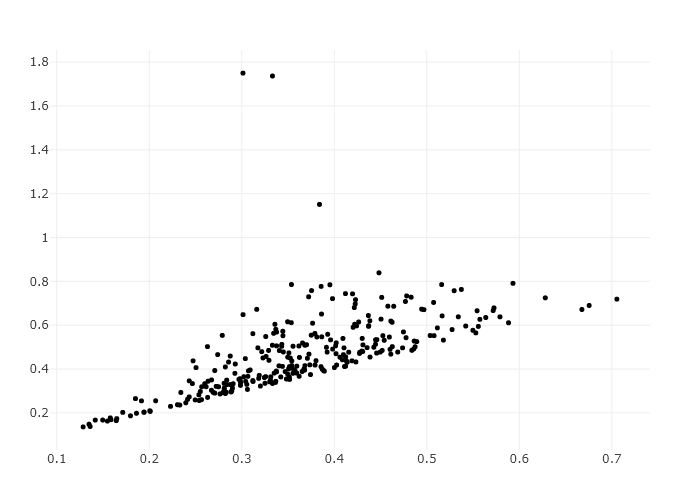

In [6]:
plotpersistencediagram_pjs(PH, dim=1)

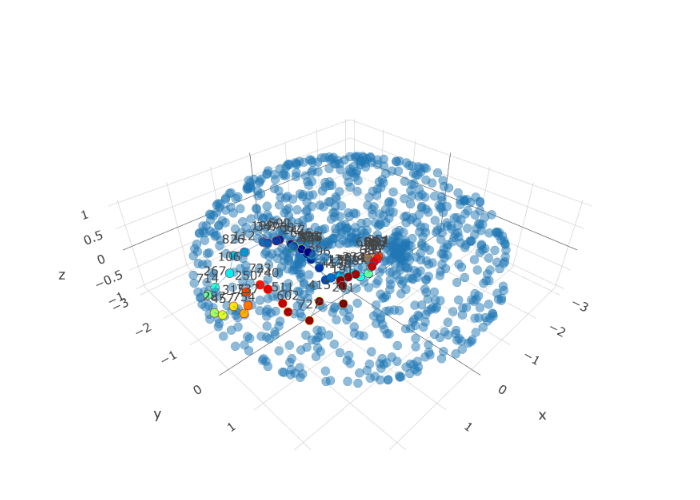

In [7]:
plotclassrep_pjs(PH,dim=1,class=274)